# Marketing Analytics of iFoodBrain

In this project, we are trying to analyze the Sales data for a company iFoodBrain and propose data-driven insights to improve their reveneue. As per marketing analytics 101, we know that 80% of the reveneue is generated by 20% of the products. Therefore during our analysis we will try to determine the highest selling products of the Company. 

Moreover, we will also inspect the performance of Campaigns that has been organised by the Company and try to detect the cause of Bottleneck.

In [104]:
from start import *
data = pd.read_csv('./Data/ifood_df.csv')

## Understanding the Data

In [105]:
print(data.shape)
data.head()

(2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


The Data consists of 2205 customer records, each with 39 features. An overview of the Data structure tell us that all the features are not required in our analysis. Thus, we will clean and compact our dataset in the following section.

## Exploratory Data Analysis

### Which Features to Drop?

* `Z_CostContact` and `Z_Revenue` are not defined by the Dataset and hence, sadly, we have to drop them. :(
* Since we have no idea when the campaigns were organized and our analysis is mostly relative than absolute hence, no of days since last purchase does not play an important role in our current analysis. Thus, we can drop `Recency`. 

In [110]:
if 'Z_CostContact' in data.columns:
    data.drop(columns =['Z_CostContact', 'Z_Revenue', 'Recency'], axis =1, inplace=True)

### Determining Outliers

<AxesSubplot:>

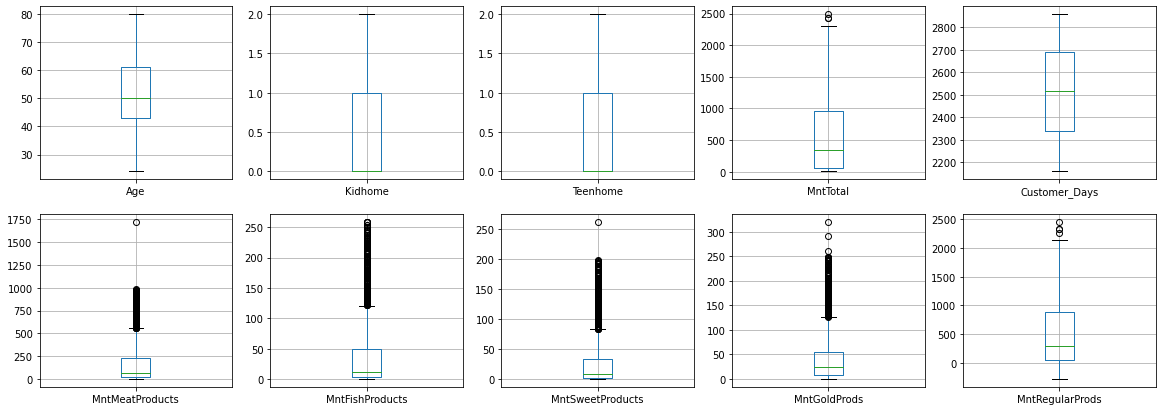

In [24]:
plt.figure(figsize = (20,7))
plt.subplot(2,5,1)
data.boxplot(column = 'Age')
plt.subplot(2,5,2)
data.boxplot(column = 'Kidhome')
plt.subplot(2,5,3)
data.boxplot(column = 'Teenhome')
plt.subplot(2,5,4)
data.boxplot(column = 'MntTotal')
plt.subplot(2,5,5)
data.boxplot(column = 'Customer_Days')
plt.subplot(2,5,6)
data.boxplot(column = 'MntMeatProducts')
plt.subplot(2,5,7)
data.boxplot(column = 'MntFishProducts')
plt.subplot(2,5,8)
data.boxplot(column = 'MntSweetProducts')
plt.subplot(2,5,9)
data.boxplot(column = 'MntGoldProds')
plt.subplot(2,5,10)
data.boxplot(column = 'MntRegularProds')

### Missing Value Imputation

In [25]:
data.isna().sum().sum()

0

Many features have been seen with outliers however, all of them seem like natural that came from the population. Therefore, the outliers are not being removed. Moreover, during this analysis, the number of features has been reduced from 39 to 36.

## Feature Management

The columns in the dataset are haphazard and hence we can order it in different segments as per basics of Marketing Analytics for simplier understanding. 

| Segment  | Meaning  |Columns  |
|---|---|---|
| Demographic | Classification based on individual attributes| Income, Age, Kidhome, Teenhome, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD |
| Firmographic | Classification based on company or organisation attributes| AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, AcceptedCmpOverall, Complain |
| Behavioural | Classification based on behaviours like product usage, technology laggards, etc.| MntWines, MntSweetProducts, MntFruits, MntMeatProducts, MntFishProducts, MntGoldProds, MntRegularProds, MntTotal, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Customer_Days |

In [26]:
data = data[['Income', 'Age', 'Kidhome', 'Teenhome',  'marital_Single', 'marital_Divorced', 'marital_Widow', 'marital_Together', 'marital_Married',  
'education_Basic', 'education_Graduation', 'education_Master', 'education_2n Cycle', 'education_PhD', 'Complain', 'AcceptedCmp1',
 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response', 'AcceptedCmpOverall', 'MntWines', 'MntSweetProducts', 'MntFruits', 
 'MntMeatProducts', 'MntFishProducts', 'MntGoldProds', 'MntRegularProds', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 
 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Customer_Days' ]] 

In [27]:
data.to_csv('./Data/cleaned-data.csv', index = False)

## Statistical Data Analysis

In this section, various statistical procedures have been used to gain insight into the company sales dataset. The following exhibits a correlation map depicting the basic relationship among various features.

<AxesSubplot:>

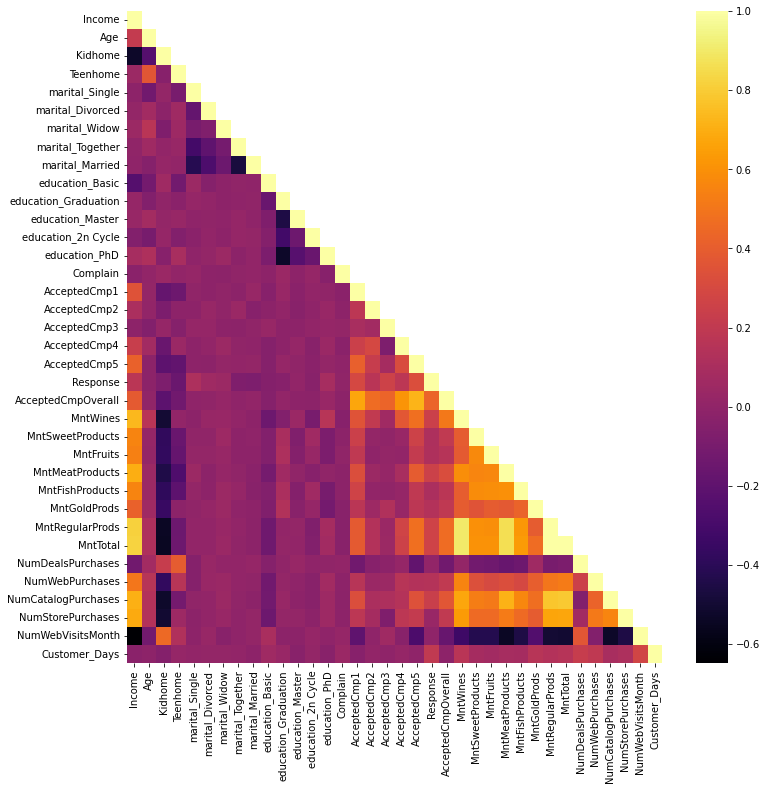

In [28]:
df = pd.read_csv('./Data/cleaned-data.csv')
correlation = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cmap='inferno', mask=np.triu(correlation, k=1))

### Basic Inferences

* Customers with higher income  prefers store and catalog purchases over deals. They show a positive correlation with all the products on offer and hence, spends more. Interestingly, they prefer Regular products more than Gold products.
* Customers with Kids at home are active on the Company website and much like Customers with Teens at home, are interested on Deals offered.
* All the campaigns carried out till now exhibits a positive correlation with the Income only. This means that the campaigns only targeted customers belonging to the higher income group and hence, failed to develop a general consumer base.
* Complaints show a negative correlation with all. Hence, the Complaint redressal department has shown quite a satisfactory performance.

 

### How does our average customer looks like?

In [29]:
customer = df.mean(axis=0)
customer['Age']
print('Age:\t\t{}\tIncome:\t\t{}'.format(customer['Age'], customer['Income']))
print('\nProducts Purchased:', customer['MntWines':'MntFishProducts'], sep='\n')
print('\nCampaign Response:', customer['AcceptedCmp1': 'Response'], sep='\n')

Age:		51.09569160997732	Income:		51622.0947845805

Products Purchased:
MntWines            306.164626
MntSweetProducts     27.128345
MntFruits            26.403175
MntMeatProducts     165.312018
MntFishProducts      37.756463
dtype: float64

Campaign Response:
AcceptedCmp1    0.064399
AcceptedCmp2    0.013605
AcceptedCmp3    0.073923
AcceptedCmp4    0.074376
AcceptedCmp5    0.073016
Response        0.151020
dtype: float64


Hence, our average customer is a 51 years old person with an annual salary of \$51,622.09. He spends an average of \$562 on products with the highest expenditure on Wines followed by Meat Products. He had no positive response to any of the campaigns organised and pays no interest to the Gold range of products. 

### What are the most crucial products sold?


R2 Score : 99.42


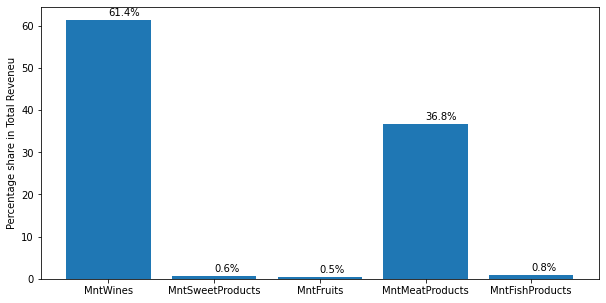

In [53]:
X = df.loc[:,'MntWines':'MntFishProducts']
Y = df.loc[:, 'MntTotal']
model, _, _ = Model(X,Y, 'Percentage share in Total Reveneu')

We can observe here that Wine and Meat Products are the two most popular product categories generating 61.4% and 36.8% i.e., 98.2% of the total reveneue respectively.

### Which category of Wine and Meat Products customers are prefering?


R2 Score : 79.31


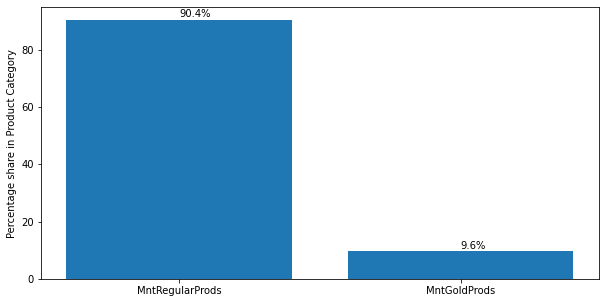

In [55]:
Y = df.loc[:,['MntWines','MntMeatProducts']]
X = df.loc[:, ['MntRegularProds', 'MntGoldProds']]
model = Model(X,Y, 'Percentage share in Product Category')

This shows that 90.4% of reveneue generated by Wine and Meat Products comes from the Regular category instead of the company's Gold Products. This is interesting because in the domain of Wine and Meat, customers are usually attracted towards the premium range. We will take deeper insights into this problem in some following section. For now, let us try to identify our priority customer base first.

### The Priority Customer

<AxesSubplot:>

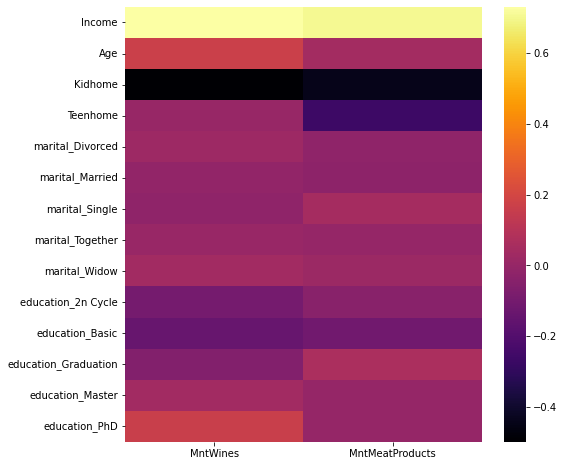

In [108]:
demographics=['Income', 'Age', 'Kidhome', 'Teenhome', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 
'marital_Widow', 'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
plt.figure(figsize=(8,8))
sns.heatmap(correlation.loc[demographics, ['MntWines', 'MntMeatProducts']], cmap = 'inferno')

Older customers who are highly educated belonging to the higher Income group exhibit a deeper liking towards Wine. These people usually do not have Kids at home. Whereas, Meat Products are usually preffered by Customers belonging to the higher income group who do not have Kids or Teens at home. Since, these Products are the highest reveneue earner in the Company, hence a simple assumption that can be drawn from here is that the Company Products are popular among affluent customers who are educated and do not have Kids at home. 

### What is the overall category prefered by customers?

Now, let us return back to our previous observation. The reveneue generated by the gold range of product was fairly low in terms of Wine and Meat. So let's try to gain overall insights in this factor.

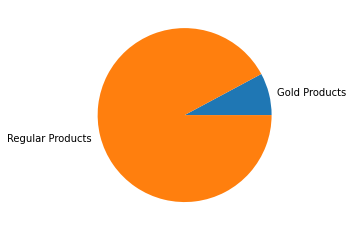

In [56]:
gold_share = (df.loc[:, 'MntGoldProds'].sum()/df.loc[:, 'MntTotal'].sum())*100
plt.pie([gold_share, 100-gold_share],labels=['Gold Products', 'Regular Products'])
plt.show()

Interestingly, the Gold range of Products which the Company has to offer, accounts for negligible 7.83% of its total reveneu. This reflects that the Company's Gold range failed to attract Customers. A Company's premium lineup forms the identity of the Company. Even after being frequented by affluent customers, the Company failed . In fact, 92.17% of the reveneue is generated by the Regular Products, which the Consumer prefers. Hence, customization of the Product line-up must be done to improve reveneue.   

### Effectiveness of the Campaigns

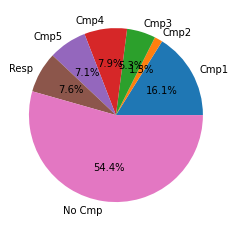

In [136]:
Y = df.loc[:, 'MntTotal']
X = df.loc[:, 'AcceptedCmp1': 'Response']
reveneu = np.zeros((7,))
for i in range(X.shape[0]):
    try:
        reveneu[X.loc[i].to_list().index(1)] += Y.loc[i]
    except ValueError:
        reveneu[6] += Y.loc[i]

plt.pie(reveneu, labels=['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Resp', 'No Cmp'], autopct='%1.1f%%')
plt.show()
    

#### Effectiveness of Similar Campaigns

Among all the campaigns conducted, Campaign 1 exhibits the most promising results. However, from initial analysis, campaign 1 and 5 showed a high correlation but campaign 5 failed to generate any satisfactory reveneu. So, let us check how similar were they?

In [102]:
relation = correlation.loc[demographics, ['AcceptedCmp1', 'AcceptedCmp5']]
relation['AcceptedCmp1'].corr(relation['AcceptedCmp5'])

0.9879441248597487

#### Inference

Most of the campaigns turned out to be failures as the reveneue generated through campaigns are quite low. However among them, Campaign 1 exhibited a marginally better response. Although, when the same ideas were used in Campaign 5, the outcome was not at all satisfactory. This could owe to the natural inquisitiveness in customers when a company makes it's first apperance, the Wow!! factor that was absent in the 5th. 

The reason for this lies on the fact that Campaigns usually try to promote the Company's Gold range of Products. However, this range is not well-received by the Consumers and hence, the Campaigns are not proving to be worthy. Another fact to substantiate this hypothesis, is that the major reveneue i.e., 54.4% has been earned not during a Campaign, through Regular Products. This depicts the like-ness of the Regular products among the Customers. 